<a href="https://colab.research.google.com/github/duonghung86/Injury-severity-classification/blob/main/VCA_2_01_Simpleclassifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Basic packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import time

# Import dataset

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/duonghung86/Injury-severity-classification/main/final%20data%20nomap.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468844 entries, 0 to 468843
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unit_Nbr                  468844 non-null  int64  
 1   Prsn_Type_ID              468844 non-null  int64  
 2   Prsn_Occpnt_Pos_ID        468844 non-null  int64  
 3   Prsn_Injry_Sev_ID         468844 non-null  int64  
 4   Prsn_Age                  468844 non-null  int64  
 5   Prsn_Ethnicity_ID         468844 non-null  int64  
 6   Prsn_Gndr_ID              468844 non-null  int64  
 7   Prsn_Ejct_ID              468844 non-null  int64  
 8   Prsn_Rest_ID              468844 non-null  int64  
 9   Prsn_Airbag_ID            468844 non-null  int64  
 10  Prsn_Helmet_ID            468844 non-null  int64  
 11  Prsn_Drg_Rslt_ID          468844 non-null  int64  
 12  Day_of_Week               468844 non-null  int64  
 13  Rpt_Rdwy_Sys_ID           468844 non-null  i

,Unit_Nbr,Prsn_Type_ID,Prsn_Occpnt_Pos_ID,Prsn_Injry_Sev_ID,Prsn_Age,Prsn_Ethnicity_ID,Prsn_Gndr_ID,Prsn_Ejct_ID,Prsn_Rest_ID,Prsn_Airbag_ID,Prsn_Helmet_ID,Prsn_Drg_Rslt_ID,Day_of_Week,Rpt_Rdwy_Sys_ID,Rpt_Road_Part_ID,Toll_Road_Fl,Crash_Speed_Limit,Road_Constr_Zone_Fl,Road_Constr_Zone_Wrkr_Fl,At_Intrsct_Fl,Wthr_Cond_ID,Light_Cond_ID,Road_Algn_ID,Surf_Cond_ID,Traffic_Cntl_ID,Latitude,Longitude,Pop_Group_ID,Unit_Desc_ID,Veh_Parked_Fl,Veh_HNR_Fl,Veh_Mod_Year,Veh_Color_ID,Veh_Make_ID,Veh_Mod_ID,Veh_Body_Styl_ID,Crash_month,Crash_day,Crash_hour,Crash_min,Weekend
0,1,1,1,5,48,1,1,1,1,2,97,97,7,2,1,0,35,0,0,1,11,1,3,1,5,30.660685,-93.893906,1,1,0,0,2002,21,107,547,69,6,15,11,0,1
1,2,1,1,2,58,1,2,1,1,3,97,1,7,2,1,0,35,0,0,1,11,1,3,1,5,30.660685,-93.893906,1,1,0,0,2012,17,91,629,30,6,15,11,0,1
2,1,1,1,5,68,1,1,1,1,2,97,97,4,2,1,0,45,0,0,0,11,1,1,1,20,33.203920,-96.596654,8,1,0,0,1996,21,672,2103,87,6,12,9,53,0
3,3,1,1,5,67,1,2,1,1,4,97,97,4,2,1,0,45,0,0,0,11,1,1,1,20,33.203920,-96.596654,8,1,0,0,2016,21,44,605,69,6,12,9,53,0
4,1,1,1,5,36,2,2,1,1,2,97,97,3,19,1,0,35,0,0,0,12,1,2,1,10,29.792394,-95.746539,0,1,0,0,2014,2,91,380,104,6,4,15,7,0


In [4]:
y=df['Prsn_Injry_Sev_ID']
y.value_counts()

5    384890
3     53032
2     24859
1      4959
4      1104
Name: Prsn_Injry_Sev_ID, dtype: int64

In [6]:
y.value_counts()/len(y)

0    0.820934
1    0.113112
2    0.053022
3    0.010577
4    0.002355
Name: Prsn_Injry_Sev_ID, dtype: float64

In [7]:
X = df.drop(columns=['Prsn_Injry_Sev_ID'])
X.shape

(468844, 40)

# Split the dataset

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=48)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,stratify=y_train, random_state=48)

X_train=np.array(X_train)
X_test=np.array(X_test)
X_val=np.array(X_val)

print('Training features shape:', X_train.shape)
print('Validation features shape:', X_val.shape)
print('Test features shape:', X_test.shape)

Training features shape: (300060, 40)
Validation features shape: (75015, 40)
Test features shape: (93769, 40)


In [10]:
# standardization
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Mini function

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import auc

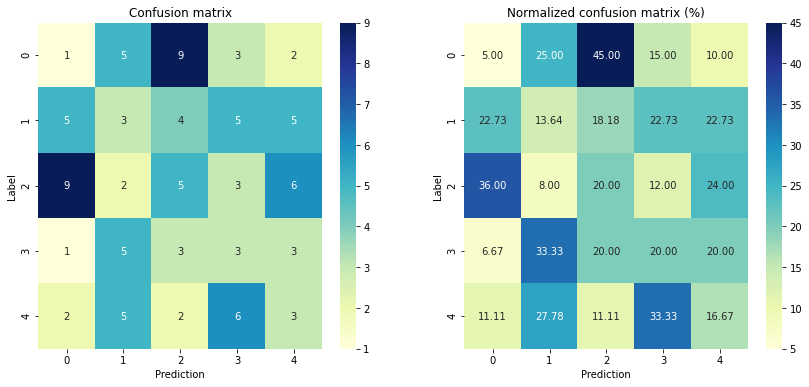

[0.15,
 0.05,
 0.13636363636363635,
 0.2,
 0.2,
 0.16666666666666666,
 0.1353678289961735]

In [29]:
def get_accs(label,prediction, show=True):
    cm = confusion_matrix(label,prediction)
    length = cm.shape[0]
    num_cases = len(label)
    # global accuracy
    glb_acc = np.trace(cm)/len(label)
    ind_accs = cm/np.sum(cm,axis=1)[:, np.newaxis]
    accs = [ind_accs[i,i] for i in range(length)]
    accs.insert(0,glb_acc)
    # G-mean
    accs.append(geometric_mean_score(label, prediction,correction=0.001))

    if show:
        plt.figure(figsize=(14, 6))
        plt.subplot(1,2,1)
        sns.heatmap(cm, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='g',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Confusion matrix')
        plt.subplot(1,2,2)
        sns.heatmap(ind_accs*100, xticklabels=np.arange(length), yticklabels=np.arange(length), 
                    annot=True, fmt='.2f',cmap="YlGnBu")
        plt.xlabel('Prediction')
        plt.ylabel('Label')
        plt.title('Normalized confusion matrix (%)')
        plt.show()
    return accs
get_accs(np.random.randint(5, size=100),np.random.randint(5, size=100))

# Applying traditional machine learning algorithms


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

LR


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


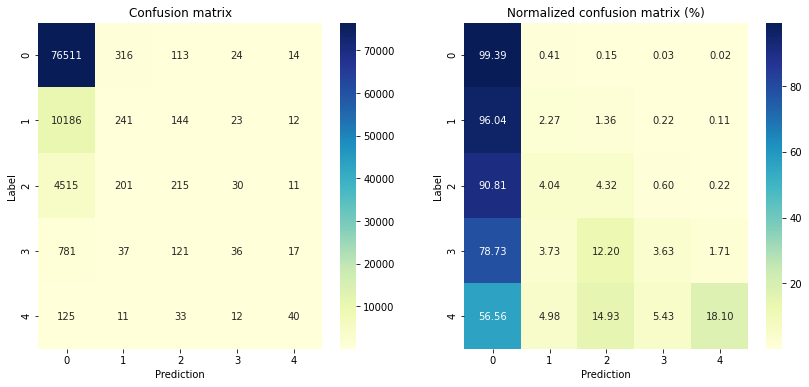

DT


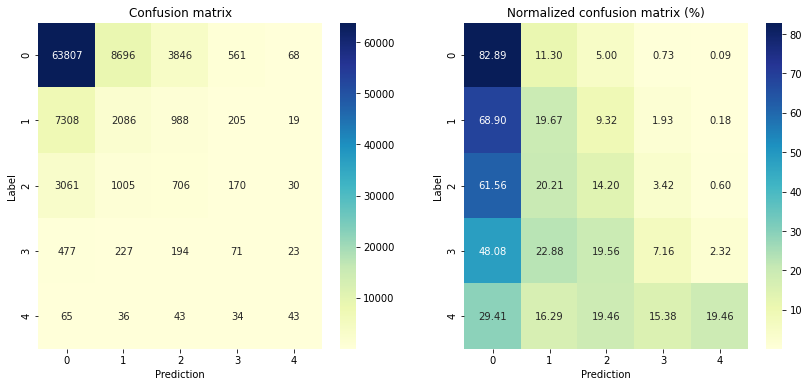

RF


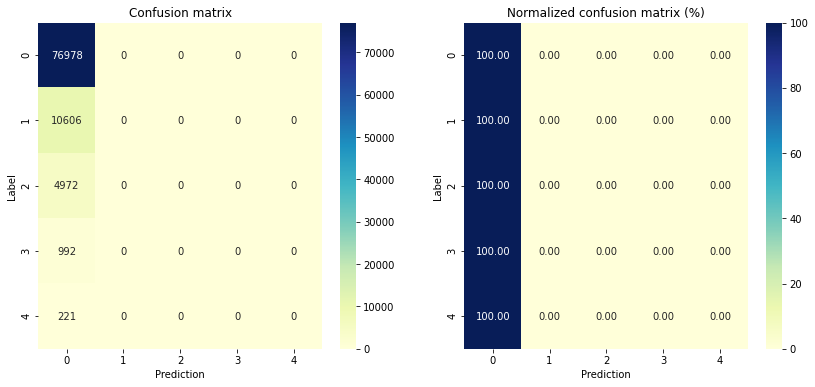

GNB


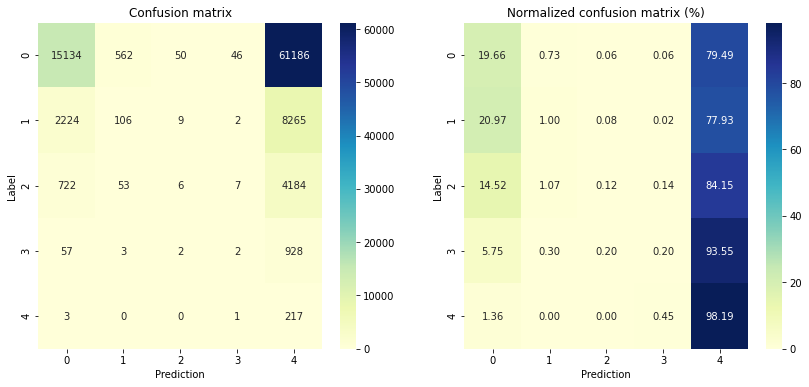

SGD


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


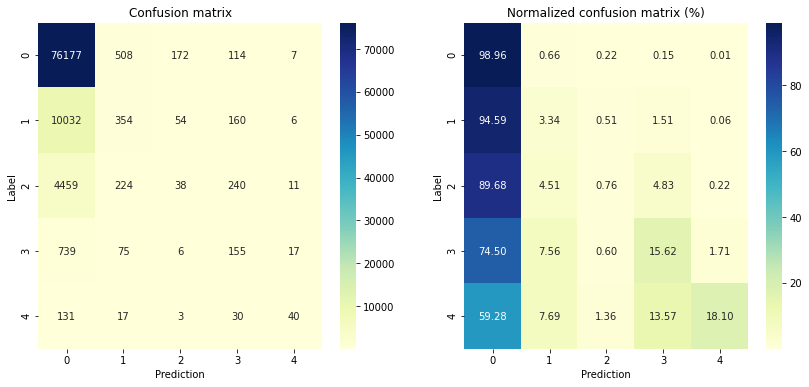

          LR        DT         RF       GNB       SGD
0   0.821625  0.711461   0.820932  0.164927  0.818650
1   0.993933  0.828899   1.000000  0.196602  0.989594
2   0.022723  0.196681   0.000000  0.009994  0.033377
3   0.043242  0.141995   0.000000  0.001207  0.007643
4   0.036290  0.071573   0.000000  0.002016  0.156250
5   0.180995  0.194570   0.000000  0.981900  0.180995
6   0.091504  0.200296   0.003981  0.021593  0.093482
7  22.036074  8.496747  11.450340  0.364249  2.089541
CPU times: user 52.4 s, sys: 11.3 s, total: 1min 3s
Wall time: 47.7 s


In [30]:
%%time
LR = LogisticRegression(solver = 'lbfgs')
DT = DecisionTreeClassifier(random_state=0)
RF = RandomForestClassifier(max_depth=2, random_state=0)
GNB = GaussianNB()
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

clfs = [LR,DT,RF,GNB,SGD]
clf_names = ['LR','DT','RF','GNB','SGD']
rsts = pd.DataFrame()
for model, name in zip(clfs,clf_names):
  start = time.time()
  print(name)
  model.fit(X_train, y_train)
  # use the model to make predictions with the test data
  y_pred = model.predict(X_test)
  end= time.time()
  # get the evaluation metrics
  result = get_accs(y_test,y_pred,True)
  result.append(end-start)
  rsts[name] = result
print(rsts)

In [31]:
index = ['Global accuracy', 'Class 1','Class 2','Class 3','Class 4','Class 5','G-mean','Training time']
rsts.index = index
rsts

,LR,DT,RF,GNB,SGD
Global accuracy,0.821625,0.711461,0.820932,0.164927,0.818650
Class 1,0.993933,0.828899,1.000000,0.196602,0.989594
Class 2,0.022723,0.196681,0.000000,0.009994,0.033377
Class 3,0.043242,0.141995,0.000000,0.001207,0.007643
Class 4,0.036290,0.071573,0.000000,0.002016,0.156250
Class 5,0.180995,0.194570,0.000000,0.981900,0.180995
G-mean,0.091504,0.200296,0.003981,0.021593,0.093482
Training time,22.036074,8.496747,11.450340,0.364249,2.089541


# MLP simple

In [46]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [50]:
MLP = tf.keras.Sequential([
    keras.layers.Dense(5, activation='relu',input_dim=X_train.shape[1]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5),
])
MLP.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/10
9377/9377 [==============================] - 10s 1ms/step - loss: 0.5916 - accuracy: 0.8209 - val_loss: 0.5787 - val_accuracy: 0.8209
Epoch 2/10
9377/9377 [==============================] - 9s 1ms/step - loss: 0.5923 - accuracy: 0.8209 - val_loss: 0.5769 - val_accuracy: 0.8209
Epoch 3/10
9377/9377 [==============================] - 9s 994us/step - loss: 0.5922 - accuracy: 0.8209 - val_loss: 0.5767 - val_accuracy: 0.8209
Epoch 4/10
9377/9377 [==============================] - 9s 989us/step - loss: 0.5922 - accuracy: 0.8209 - val_loss: 0.5777 - val_accuracy: 0.8209
Epoch 5/10
9377/9377 [==============================] - 9s 999us/step - loss: 0.5926 - accuracy: 0.8209 - val_loss: 0.5777 - val_accuracy: 0.8209
Epoch 6/10
9377/9377 [==============================] - 10s 1ms/step - loss: 0.5924 - accuracy: 0.8209 - val_loss: 0.5780 - val_accuracy: 0.8209
Epoch 7/10
9377/9377 [==============================] - 10s 1ms/step - loss: 0.5922 - accuracy: 0.8209 - val_loss: 0.5761 - val_

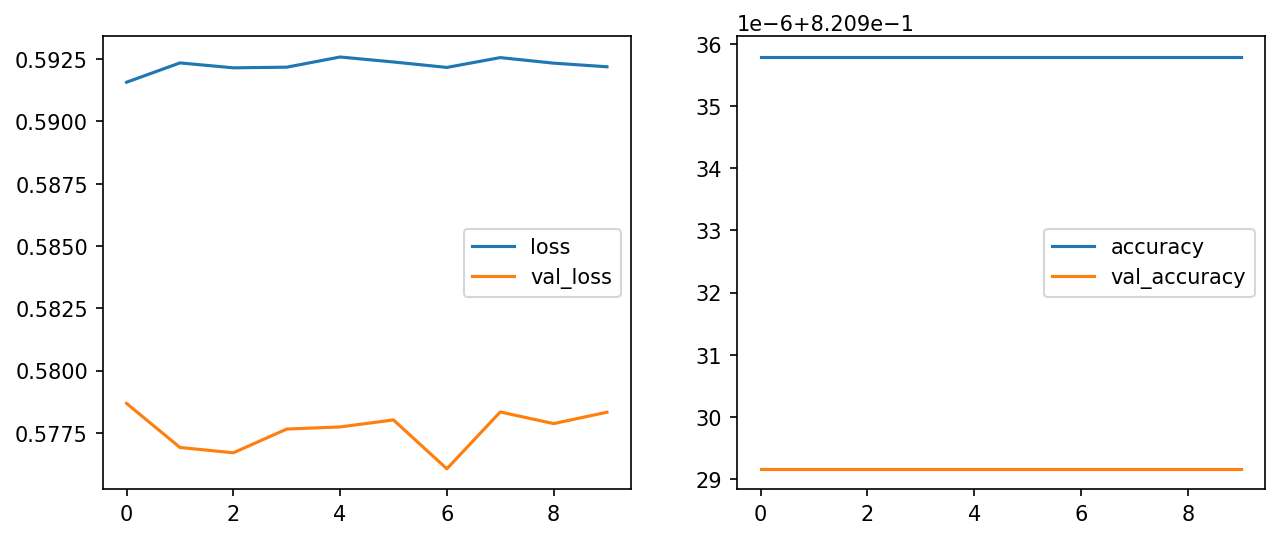

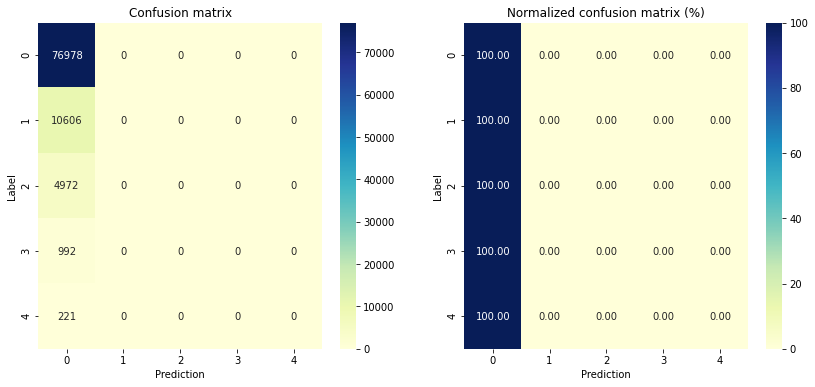

,LR,DT,RF,GNB,SGD,MLP
Global accuracy,0.821625,0.711461,0.820932,0.164927,0.818650,0.820932
Class 1,0.993933,0.828899,1.000000,0.196602,0.989594,1.000000
Class 2,0.022723,0.196681,0.000000,0.009994,0.033377,0.000000
Class 3,0.043242,0.141995,0.000000,0.001207,0.007643,0.000000
Class 4,0.036290,0.071573,0.000000,0.002016,0.156250,0.000000
Class 5,0.180995,0.194570,0.000000,0.981900,0.180995,0.000000
G-mean,0.091504,0.200296,0.003981,0.021593,0.093482,0.003981
Training time,22.036074,8.496747,11.450340,0.364249,2.089541,96.508660


In [53]:
start = time.time()
Monitor_MLP = MLP.fit(X_train, y_train, callbacks=[es],validation_data = (X_val,y_val), verbose = 1, epochs=10)
# use the model to make predictions with the test data
y_pred = MLP.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
end= time.time()

# Show evolution of the training process
hist = pd.DataFrame(Monitor_MLP.history)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4),dpi=150)
hist[['loss','val_loss']].plot(ax=axes[0])
hist[['accuracy','val_accuracy']].plot(ax=axes[1])
plt.show()
# get the evaluation metrics
result = get_accs(y_test,y_pred,True)
result.append(end-start)

rsts['MLP'] = result
rsts

# Variables


In [ ]:
%whos